# <center> TP 3: Logistic Regression<br> <small>Réda DEHAK<br> 22 November 2018</small> </center>

The goal of this lab is :
    - Test the logistic regression on classification problems
    
We will use the [Wine dataset](https://archive.ics.uci.edu/ml/datasets/Wine) from UCI. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of thirteen constituents found in each of the three types of wines.

# Loading and Plotting Data
 
First, we will use only two features from the data set: alcohol and ash (We can plot the solution in 2D space). The labels are supplied as an array of data with values from 1 to 3, but at first, we want a simple binary regression problem with a yes or no answer.  

We filter the data set, reducing it to only include wines with labels 1 or 2.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize

data = pd.read_csv('data.txt')

reduced = data[data['class'] <= 2]
X = reduced.as_matrix(columns=['alcohol', 'ash'])
y = label_binarize(reduced['class'].values, [1, 2])[:,0]

In [2]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
print('train:', len(Xtrain), 'test:', len(Xtest))

train: 97 test: 33


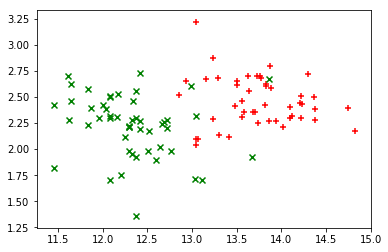

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

MARKERS = ['+', 'x', '.']
COLORS = ['red', 'green', 'blue']

def plot_points(xy, labels):
    
    for i, label in enumerate(set(labels)):
        points = np.array([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)

plot_points(Xtrain, ytrain)

We can see that we can plot line that could divide the two colored points with a small amount of error.

# Logistic Regression

To implement logistic regression, we need to define the cost function $J(\theta)$, and compute the partial derivatives of $J(\theta)$. As we have seen previously:

$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}y_{i}\log(f_\theta(x_{i}))+(1-y_{i})\log(1-f_\theta(x_{i}))
$$

where $f_\theta(x)$ is the logistic function

$$
f_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}
$$

- Compute the partiel derivatives of $J(\theta)$ and define the update formula of the gradient descent algorithm?

_First we need the derivative of $f_{\theta}$ against $\theta$_

_For each component $j$:_

_$$\frac{df_{\theta}(x)}{d\theta_j} = \frac{d}{d\theta_j}.\frac{1}{1 + e^{-\theta^Tx}} = \frac{-x_j.e^{-\theta^Tx}}{(1 + e^{-\theta^Tx})^2}$$_

_$$\frac{df_{\theta}(x)}{d\theta_j} = f_\theta(x).\frac{-e^{-\theta^Tx}}{1 + e^{-\theta^Tx}}.x_j$$_

_$$\frac{df_{\theta}(x)}{d\theta_j} = f_\theta(x).(1 - f_\theta(x)).x_j$$_

_We then derivate against each component:_

_$$\frac{df_{\theta}(x)}{d\theta} = f_\theta(x).(1 - f_\theta(x)).x$$_

_Now that we have $\frac{df_\theta}{d\theta}$ we compute the derivative $\frac{dJ(\theta)}{d\theta}$_

_First we consider one point $(x_j, y_j)$_

_$$\frac{dJ(\theta)}{d\theta_j} = \frac{d}{d\theta_j}y.log(f_\theta(x_j)) + \frac{d}{d\theta_j}(1 - y_j).log(1 - f_\theta(x))$$_

_$$\frac{dJ(\theta)}{d\theta_j} = \frac{y_j}{f_{\theta}(x_j)}.\frac{df_{\theta_j}(x_j)}{d\theta_j} + \frac{1 - y_j}{1 - f_{\theta_j}(x_j)}.\frac{-df_{\theta_j}(x_j)}{d\theta_j}$$_

_$$\frac{dJ(\theta)}{d\theta_j} = \frac{y_j - y_j.f_\theta(x) - f_\theta(x) + y_j.f_\theta(x)}{f_\theta(x).(1 - f_\theta(x))}.\frac{df_\theta(x_j)}{d\theta_j}$$_

_$$\frac{dJ(\theta)}{d\theta_j} = (y_j - f_\theta(x))x_j$$_

_Then we derivate for all the components and the entire dataset:_

_$$
\frac{dJ(\theta)}{d\theta} = \frac{1}{N}\sum_{i=1}^{N}(f_\theta(x^i) - y^i)x
$$_

This derivative looks like the linear regression loss function derivative, but we can not solve the equation $J(\theta)=0$ because $f_{\theta}$ is more complex than the simple product we had with the $W$ matrix

- Write a function LogRegTrain(x, y, num_epochs, learning_rate = 0.01) which compute $\theta$ that minimize $J(\theta)$

In [4]:
def prepend_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

In [5]:
def logistic(theta, X):
    return np.array(1 / (1 + np.exp(np.sum(-theta.T @ X.T, axis=0))))

def loss(theta, X, Y):
    yhat = logistic(theta, X)
    return -np.mean((1 - Y) * np.log(1 - yhat + 1e-9) + Y * np.log(yhat + 1e-9))

def loss_derivative(theta, X, Y):
    return np.mean(np.diag(logistic(theta, X) - Y) @ X, axis=0).reshape(-1, 1)

In [6]:
def LogRegTrain(X, Y, num_epochs, learning_rate=0.05, verbose=True):
    old = None
    X = prepend_bias(X)
    theta = np.zeros((X.shape[1], 1))
    for epoch in range(num_epochs):
        g = loss_derivative(theta, X, Y)
        theta = theta - (learning_rate * g)
        l = loss(theta, X, Y)
        if old and abs(old - l) < 0.00000001:
            break
        else:
            old = l
            if verbose and (not epoch % 5000):
                print(f'epoch {epoch}, loss: {l}')
    return theta

In [7]:
W = LogRegTrain(Xtrain, ytrain, 50000)

epoch 0, loss: 0.6932257853191974
epoch 5000, loss: 0.6470080054246986
epoch 10000, loss: 0.4600609892121738
epoch 15000, loss: 0.40264771793185317
epoch 20000, loss: 0.36240565449813167
epoch 25000, loss: 0.3329528251957552
epoch 30000, loss: 0.31061513260588164
epoch 35000, loss: 0.293173646385867
epoch 40000, loss: 0.2792258565275868
epoch 45000, loss: 0.2678486512494749


In [8]:
y_pred = logistic(W, np.c_[np.ones((Xtest.shape[0], 1)), Xtest])
y_pred = np.array([int(y > 0.5) for y in y_pred])
print(ytest)
print(y_pred)

[1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1]
[1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1]


- Plot the boundary and checks that it is linear? 

In [9]:
def prediction_map(predict_fun, xs=10, xe=15, xn=300, ys=0, ye=6, yn=300, transform=None):

    x = np.linspace(xs, xe, xn)
    y = np.linspace(ys, ye, yn)
    inp = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
    if transform:
        inp = transform(inp)
    inp = np.c_[np.ones((inp.shape[0], 1)), inp]
    z = predict_fun(inp).reshape(300, 300).T
    
    return x, y, z

In [10]:
predict_fun = lambda X: logistic(W, X) > 0.5
x, y, z = prediction_map(predict_fun, ys=1, ye=4)

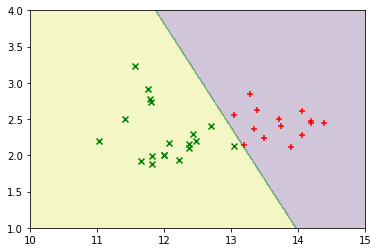

In [11]:
plt.contourf(x, y, z, alpha=0.25)
plot_points(Xtest, y_pred)

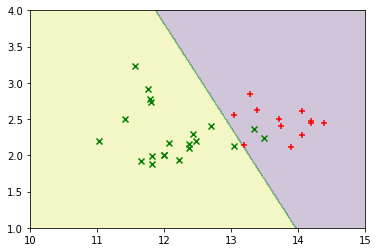

In [12]:
plt.contourf(x, y, z, alpha=0.25)
plot_points(Xtest, ytest)

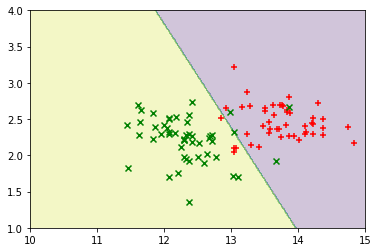

In [13]:
plt.contourf(x, y, z, alpha=0.25)
plot_points(Xtrain, ytrain)

- How can we obtain a quadratic boundary? check it?

In [14]:
def quadratic_transform(x):
    return np.c_[x[:, 0], x[:, 1], x[:, 0] ** 2, x[:, 1] ** 2, np.multiply(x[:, 0], x[:,1])]

In [15]:
W = LogRegTrain(quadratic_transform(Xtrain), ytrain, 20000, verbose=False)
x, y, z = prediction_map(predict_fun, ys=1, ye=4, transform=quadratic_transform)

/home/nicolas/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


_We have a single warning on an overflow happening here. Since it was not harmful for the rest of the computations, I did not take the time to investigate._

In [16]:
y_pred = np.around(logistic(W, prepend_bias(quadratic_transform(Xtest))))

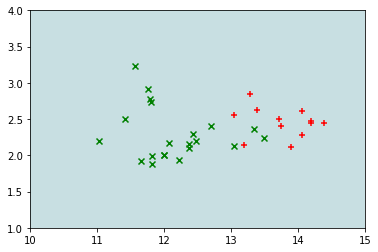

In [17]:
plt.contourf(x, y, z, alpha=0.25)
plot_points(Xtest, ytest)

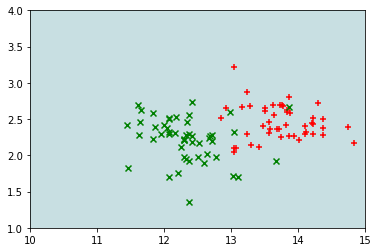

In [18]:
plt.contourf(x, y, z, alpha=0.25)
plot_points(Xtrain, ytrain)

# Multinomial Logistic Regression

The next step is something more interesting: we use a similar set of two features from the data set (this time alcohol and flavanoids), but with all three labels instead of two.

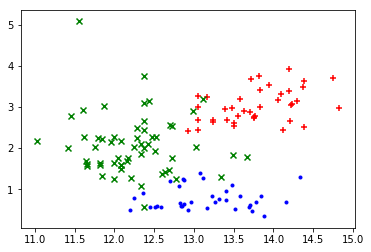

In [19]:
X = data.as_matrix(columns=['alcohol', 'flavanoids'])
y = data.as_matrix(columns=['class'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
ytrain = label_binarize(ytrain, [1, 2, 3])

plot_points(Xtrain, ytrain.argmax(axis=1))

The plotted data points again suggest some obvious linear boundaries between the three classes.

We can solve this problem as three one-vs-all problems, and re-use all the previous code. In this part, we will try another solution inspired from softmax function known as softmax regression (See C.Bishop, "Pattern Recognition and Machine Learning", 2006, Springer).

$$
S_{\theta, k}(x) = \frac{e^{\theta_k^Tx}}{\sum\limits_{c=1}^K e^{\theta_c^Tx}}
$$

_In order to optimize J(\theta), we first compute the softmax derivative on each component:_

_**case 1: $j = k$**_

_let $\sum$ denote $\sum\limits^K_{c=1}e^{\theta^T_cx}$_

_$$
\frac{dS_{\theta, k}(x)}{d\theta_j} = \frac{\frac{de^{\theta_k^Tx}}{d\theta_j}.\sum - \frac{de^{\theta_j^Tx}}{d\theta_j}.e^{\theta^Tx_k}}{\sum^2}
$$_

_$$\frac{dS_{\theta, k}(x)}{d\theta_j} = x_j.S_{\theta,j}(x).\frac{\sum - e^{\theta^Tx_k}}{\sum}$$_

_$$\frac{dS_{\theta, k}(x)}{d\theta_j} = x_j.S_{\theta,j}(x).(1 - x_j.S_{\theta,k}(x))$$_

_**case 2: $j \neq k$**_

_$$
\frac{dS_{\theta, k}(x)}{d\theta_j} = \frac{-\frac{de^{\theta_j^Tx}}{d\theta_j}.e^{\theta_k^Tx}}{\sum^2}
$$_
_$$
\frac{dS_{\theta, k}(x)}{d\theta_j} = \frac{-x_j.e^{\theta_j^Tx}.e^{\theta^T_kx}}{\sum^2}
$$_
_$$
\frac{dS_{\theta, k}(x)}{d\theta_j} = x_j.S_{\theta, j}(x).(-S_{\theta, k}(x))
$$_

_Combining both results, we obtain the following:_

_$$\frac{dS_{\theta, k}(x)}{d\theta_j} = x_j.S_{\theta,j}(x).(I_k - x_j.S_{\theta,k}(x))$$_

_Where $I_k$ denotes the identity matrix. This form is the same as the derivative of the logistic function. We can prove in a similar way that:_

_$$
\frac{dJ(\theta)}{d\theta} = \frac{1}{N}\sum_{i=1}^{N}(S_\theta(x_i) - y_i)x
$$_

This derivative looks like the linear regression loss function derivative, but we can not solve the equation $J(\theta)=0$ because $f_{\theta}$ is more complex than the simple product we had with the $W$ matrix

In [20]:
def softmax(w, x):
    wx = x @ w
    u = np.exp(wx)
    v = np.sum(u, axis=-1).reshape(-1,1)
    softmax = u / v
    return softmax

def xlogx(y1, y2):
    res = np.zeros(y1.shape)
    ind = np.where(y1 != 0)
    res[ind] = np.multiply(y1[ind], np.log(y2[ind]))
    return res

def cost(w, x, y, yhat):
    K = w.shape[1]
    s = 0
    for k in range(K):
        s += np.sum(xlogx(y[:, k], yhat[:, k]))
    return -s / len(y)

In [21]:
def MultinomialTrain(x, y, num_epochs, learning_rate=0.03, regularisation=lambda w: 0):
    N = x.shape[0]
    x = prepend_bias(x)
    d = x.shape[1]
    K = y.shape[1]
    w = np.zeros((d, K))
        
    for i in range(num_epochs):
        yhat = softmax(w, x)
        j = cost(w, x, y, yhat)
        error = yhat - y
        if ((i % 10000) == 0):
            print('Iteration : ', i, 'Error -LLK : ', j, ' Error MSE :', np.linalg.norm(error))
        dj = x.T.dot(error) / N
        w = w - learning_rate * dj
    return w

In [22]:
W = MultinomialTrain(Xtrain, ytrain, 100000)

Iteration :  0 Error -LLK :  1.09861228866811  Error MSE : 9.416297927883692
Iteration :  10000 Error -LLK :  0.390106086285045  Error MSE : 5.480377872560311
Iteration :  20000 Error -LLK :  0.3271162451255301  Error MSE : 4.91375176985452
Iteration :  30000 Error -LLK :  0.2909785026904677  Error MSE : 4.592443237776604
Iteration :  40000 Error -LLK :  0.2676619452978632  Error MSE : 4.389567479972864
Iteration :  50000 Error -LLK :  0.25141081627867634  Error MSE : 4.251371070593083
Iteration :  60000 Error -LLK :  0.23944194194658494  Error MSE : 4.1519612040139675
Iteration :  70000 Error -LLK :  0.23025771902027242  Error MSE : 4.077481299900612
Iteration :  80000 Error -LLK :  0.22298505418259135  Error MSE : 4.019897484762717
Iteration :  90000 Error -LLK :  0.21708190447229325  Error MSE : 3.974253310904491


_As we can see this training requires an important number of epochs, and is quite slow. We'll later use the Newton method in order to speed things up, and to be more stable numerically._

- Propose a solution using this function and test it with linear and quadratic separator? 

In [23]:
y_pred = softmax(W, prepend_bias(Xtest))
y_pred = np.array([np.argmax(y) + 1 for y in y_pred])
print(ytest.T[0, :35])
print(y_pred[:35])

[1 3 1 3 1 1 1 3 3 2 2 2 2 1 3 1 3 3 2 2 1 1 3 3 3 2 2 1 1 1 2 3 1 1 2]
[1 3 1 3 2 1 2 2 3 1 2 2 2 1 3 1 3 3 2 2 1 1 3 3 3 2 2 2 1 1 3 2 1 1 2]


In [24]:
predict_fun = lambda X: np.argmax(softmax(W, X), axis=1)
x, y, z = prediction_map(predict_fun, xs=10.7, ye=5.5)

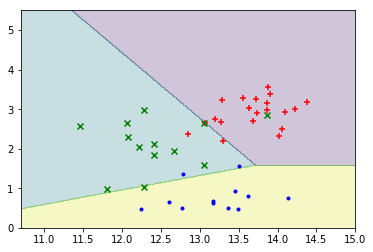

In [25]:
plt.contourf(x, y, z, alpha=0.25)
plot_points(Xtest, ytest[:, 0])

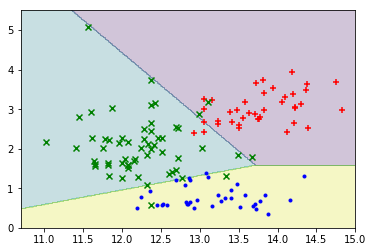

In [26]:
plt.contourf(x, y, z, alpha=0.25)
plot_points(Xtrain, ytrain.argmax(axis=1))

_The quadratic separator can not be computed with our bare metal SGD algorithm. We face too many problems of numeric stability. For the following parts, we will use the Newton method, which happen to be much faster on this task. This method is more stable because it needs a far inferior number of epochs_

In [27]:
def MultinomialTrainNewton(x, y, precision=.01, 
                           dreg=lambda w, l: 0., l_reg=1,
                           verbose=True):
    N = x.shape[0]
    x = np.c_[np.ones((N, 1)), x]
    d = x.shape[1]
    K = y.shape[1]
    y = y.reshape((N, K))
    w = np.zeros((d, K))
    diff = precision + 1
    i = 0;
    while (diff > precision):
        yhat = softmax(w, x)
        j = cost(w, x, y, yhat) + l_reg
        error = yhat.reshape((N, K)) - y.reshape((N, K))
        if i % 10000 == 0 and verbose:
            print('Iteration : ', i, 'Error -LLK : ', j, ' Error MSE :', np.linalg.norm(error))
        dj = x.T.dot(error)/ N + dreg(w, l_reg)

        diff = 0
        for k in range(K):
            diag = np.diag(np.multiply(yhat[:, k], 1 - yhat[:, k]))
            d2j = x.T.dot(diag).dot(x) 
            d2j += l_reg * np.eye(d2j.shape[0], d2j.shape[1])
            delta = np.linalg.inv(d2j) @ dj[:, k]
            w[:, k] -= delta
            diff += np.linalg.norm(delta)
        i = i + 1
    verbose and print(f'{i} iterations')
    return w

In [28]:
x = quadratic_transform(Xtrain)
W = MultinomialTrainNewton(x, ytrain)

Iteration :  0 Error -LLK :  2.09861228866811  Error MSE : 9.416297927883692
333 iterations


In [29]:
y_pred = softmax(W, prepend_bias(quadratic_transform(Xtest))).argmax(axis=1) + 1
print(y_pred)
print(ytest.T[0])

[1 3 1 3 1 1 2 3 3 1 2 2 2 1 3 1 3 3 2 2 1 1 3 3 3 2 2 1 1 1 2 2 1 1 2 1 1
 1 3 1 1 2 1 1 2]
[1 3 1 3 1 1 1 3 3 2 2 2 2 1 3 1 3 3 2 2 1 1 3 3 3 2 2 1 1 1 2 3 1 1 2 1 1
 1 3 1 2 2 1 1 2]


In [30]:
predict_fun = lambda X: np.argmax(softmax(W, X), axis=1)
x, y, z = prediction_map(predict_fun, xs=10, xe=15, ys=0, ye=6, transform=quadratic_transform)

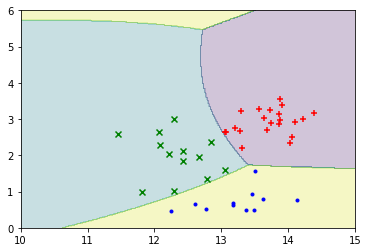

In [31]:
plt.contourf(x, y, z, alpha=0.25)
plot_points(Xtest, y_pred)

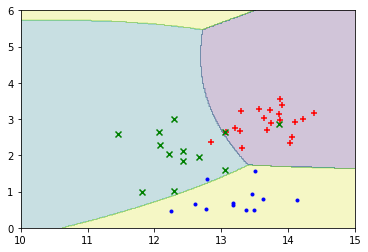

In [32]:
plt.contourf(x, y, z, alpha=0.25)
plot_points(Xtest, ytest.T[0])

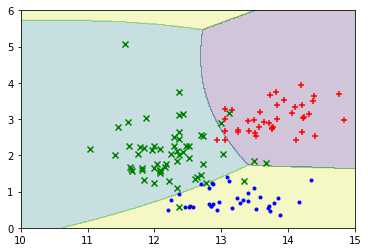

In [33]:
plt.contourf(x, y, z, alpha=0.25)
plot_points(Xtrain, ytrain.argmax(axis=1))

# Regularization

Next, we want to include all the features from the data set.  

In [34]:
X = data.drop('class', 1).as_matrix().astype(np.int64)
y = data.as_matrix(columns=['class'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
ytrain = label_binarize(ytrain, [1, 2, 3])

Because we are now significantly increasing the number of features, we apply regularisation  as part of new cost and gradient functions.  As we have seen with linear regression, regularization prevents overfitting, a situation where a large number of features allows the classifier to fit the training set *too* exactly, meaning that it fails to generalize well and perform accurately on data it hasn't yet seen.

To avoid this problem, we add an additional term to the cost function

$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}[y^{i}\log(f_\theta(x^{i}))+(1-y^{i})\log(1-f_\theta(x^{i}))] + \frac{\lambda}{2}\|\theta\|_2^2
$$

- Compute the partiel derivatives of $J(\theta)$ and define the update formula of the gradient descent algorithm?

In [35]:
def l2_regularisation(theta, lam):
    return (lam / 2) * np.linalg.norm(theta) ** 2

def delta_l2_regularisation(theta, lam):
    return (lam * theta)

- Write a function that minimize $J(\theta)$ and test it on the WINE dataset?

In [36]:
W1 = MultinomialTrainNewton(Xtrain, ytrain)

Iteration :  0 Error -LLK :  2.09861228866811  Error MSE : 9.41629792788369
617 iterations


In [37]:
y_pred = softmax(W1, prepend_bias(Xtest)).argmax(axis=1) + 1
print(ytest.T[0])
print(y_pred)

[2 2 2 1 1 2 2 1 1 1 1 3 3 2 3 1 3 2 1 2 2 2 3 3 2 2 1 3 2 1 2 1 1 2 2 2 1
 3 2 2 3 2 2 3 2]
[1 3 2 1 1 2 2 1 1 1 1 3 3 2 3 1 3 2 2 2 2 2 3 3 2 2 1 3 2 1 2 1 1 2 2 2 1
 3 2 2 3 2 2 3 2]


In [38]:
from sklearn.metrics import accuracy_score

In [39]:
for l_reg in np.logspace(0.1, 5, 15):
    dreg=lambda w, l: w * l
    W = MultinomialTrainNewton(Xtrain, ytrain, verbose=False, dreg=dreg, l_reg=l_reg)
    y_pred = softmax(W, np.c_[np.ones((Xtest.shape[0], 1)), Xtest])
    y_pred = np.array([np.argmax(y) + 1 for y in y_pred])
    acc=accuracy_score(ytest.T[0], y_pred)
    print(f'regularisation: {l_reg},\taccuracy: {acc}')

regularisation: 1.2589254117941673,	accuracy: 0.9333333333333333
regularisation: 2.818382931264454,	accuracy: 0.9333333333333333
regularisation: 6.309573444801933,	accuracy: 0.9333333333333333
regularisation: 14.125375446227547,	accuracy: 0.9555555555555556
regularisation: 31.62277660168381,	accuracy: 0.9555555555555556
regularisation: 70.79457843841384,	accuracy: 0.9555555555555556
regularisation: 158.48931924611142,	accuracy: 0.9111111111111111
regularisation: 354.81338923357566,	accuracy: 0.8666666666666667
regularisation: 794.3282347242822,	accuracy: 0.8222222222222222
regularisation: 1778.2794100389247,	accuracy: 0.7555555555555555
regularisation: 3981.0717055349774,	accuracy: 0.7111111111111111
regularisation: 8912.509381337468,	accuracy: 0.7111111111111111
regularisation: 19952.62314968879,	accuracy: 0.6888888888888889
regularisation: 44668.359215096345,	accuracy: 0.6444444444444445
regularisation: 100000.0,	accuracy: 0.6222222222222222


- Compare with non regularized version?

In [40]:
W = MultinomialTrainNewton(Xtrain, ytrain, verbose=False)
y_pred = softmax(W, np.c_[np.ones((Xtest.shape[0], 1)), Xtest])
y_pred = np.array([np.argmax(y) + 1 for y in y_pred])
acc=accuracy_score(ytest.T[0], y_pred)
print(acc)

0.9333333333333333


_We can see that the regularisation affects the accuracy of the obtained model. At a certain point, the model is less able to learn the features of the dataset, and we underfit. On the other hand, a well chosen regularization prevents the overfitting_

## TODO:

- [x] regularisation
- [x] nice derivatives
- [x] newton
- [x] quadratic
- [x] frontier plot reda style
- [x] compare regularized/non regularized
- [x] conclusion